## User Agent Wellbeing and Incident Volume Analysis (Flag 60)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Investigate trends in increasing incident assignments to understand their impact on user agents. 

**Role**: Wellbeing Manager

**Difficulty**: 2 out of 5.

**Category**: Incident Management



## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the dataset used in the analysis. The dataset is stored in a CSV file and is loaded into DataFrame. This cell reads the data from a file path and performs initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-60.csv"
df = pd.read_csv(dataset_path)
#display rows. 
df.head() 

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1**: What is the trend of time to resolution (ttr) over time?

#### Plot the trend of Incident Resolution Times

This cell generates a line plot showing the monthly trend of incident resolution times, providing a visual representation of how the average TTR changes over time.

Text(0.5, 1.0, 'Time to resolution by creation date')

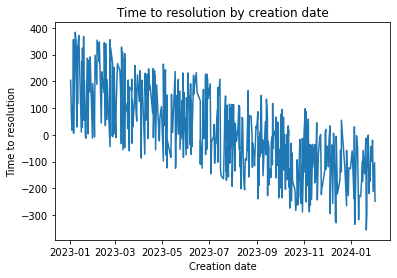

In [3]:
# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

sns.lineplot(x=df["opened_at"], y=df["resolution_time"])
plt.xlabel("Creation date")
plt.ylabel("Time to resolution")
plt.title("Time to resolution by creation date")

#### Generate JSON Description for the Insight

In [4]:
{
"data_type":"diagnostic",
"insight": "The time to resolution of incidents is slightly decreasing over time.",
"insight_value":{"trend": "None"},
"plot": {
    "plot_type": "line",
    "title": "Trend of Time to Resolution (TTR) Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is drawn through these points to show the trend of TTR over time."
},
"question": "What is the trend of time to resolution (ttr) over time?",
"actionable_insight": "The time to resolution of incidents is slightly decreasing over time. This could be due to improvements in the incident resolution process or better coordination among teams. To maintain this trend, it is important to continue monitoring the TTR and identify areas where further improvements can be made."
}

{'data_type': 'diagnostic',
 'insight': 'The time to resolution of incidents is slightly decreasing over time.',
 'insight_value': {'trend': 'None'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Time to Resolution (TTR) Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The line plot displays the trend of time to resolution (TTR) over time. Each point on the line represents the average TTR for incidents opened on a particular date. The line is drawn through these points to show the trend of TTR over time.'},
 'question': 'What is the trend of time to resolution (ttr) over time?',
 'actionable_insight': 'The time to resolution of incidents is slightly decreasing over time. This could be due to improvements in the incident resoluti

### **Question 2:** Is there a correlation between the volume of incidents and the ttr?

#### Plot correlation between incident volume and average TTR

This cell plots the relationship between the volume of incidents and the time to resolution (TTR) by visualizing two metrics over the same time period as line plots.

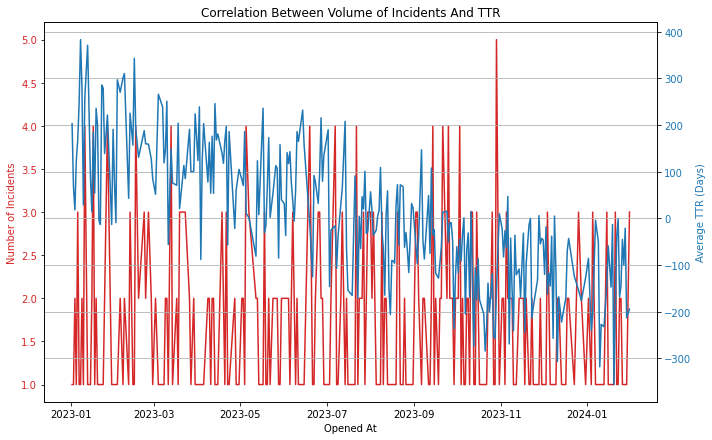

In [5]:
# Group by opened_at date and calculate count of incidents and average ttr
df['ttr'] = df['closed_at'] - df['opened_at']

# Convert ttr to days
df['ttr_days'] = df['ttr'].dt.days
incident_ttr_trend = df.groupby(df['opened_at'].dt.date).agg({'number':'count', 'ttr_days':'mean'})

# Plot the trend
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_xlabel('Opened At')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(incident_ttr_trend.index, incident_ttr_trend['number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Average TTR (Days)', color=color)  
ax2.plot(incident_ttr_trend.index, incident_ttr_trend['ttr_days'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Correlation Between Volume of Incidents And TTR')
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
"data_type":"diagnostic",
"insight": "There is no correlation between the volume of incidents and the TTR. Unlike TTR, the number of incidents is increasing over time. This indicates that as the volume of incidents increases, while the TTR tends to be uniform",
"insight_value":{"correlation": "None"},
"plot": {
    "plot_type": "dual_axis_line",
    "title": "Correlation Between Volume of Incidents And TTR",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis_1": {
        "name": "Number of Incidents",
        "description": "This represents the number of incidents opened on a particular date."
    },
    "y_axis_2": {
        "name": "Average TTR (Days)",
        "description": "This represents the average time to resolution (in days) of incidents opened on a particular date."
    },
    "description": "The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue line represents the average TTR. As the number of incidents increases, the TTR also tends to increase, indicating a positive correlation."
},
"question": "Is there a correlation between the volume of incidents and the ttr?",
"actionable_insight": "There is no correlation between the volume of incidents and the TTR. Unlike TTR, the number of incidents is increasing over time. This indicates that as the volume of incidents increases, while the TTR tends to be uniform. To improve incident resolution efficiency, it is important to identify bottlenecks in the resolution process and address them accordingly."
}

{'data_type': 'diagnostic',
 'insight': 'There is no correlation between the volume of incidents and the TTR. Unlike TTR, the number of incidents is increasing over time. This indicates that as the volume of incidents increases, while the TTR tends to be uniform',
 'insight_value': {'correlation': 'None'},
 'plot': {'plot_type': 'dual_axis_line',
  'title': 'Correlation Between Volume of Incidents And TTR',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis_1': {'name': 'Number of Incidents',
   'description': 'This represents the number of incidents opened on a particular date.'},
  'y_axis_2': {'name': 'Average TTR (Days)',
   'description': 'This represents the average time to resolution (in days) of incidents opened on a particular date.'},
  'description': 'The dual-axis line plot displays the correlation between the volume of incidents and the TTR. The red line represents the number of incidents and the blue li

### **Question 3:** Is the increase in volume of incidents is uniform across all categories of incidents or is it more pronounced in a specific category?

#### Plot trend in volume of incident tickets per week by category

This cell creates a line plot to visualize the trend in the volume of incident tickets opened each week, categorized by incident type. The plot facilitates a detailed examination of how incident volumes are distributed across different categories over time and whether any specific category is experiencing more pronounced changes.

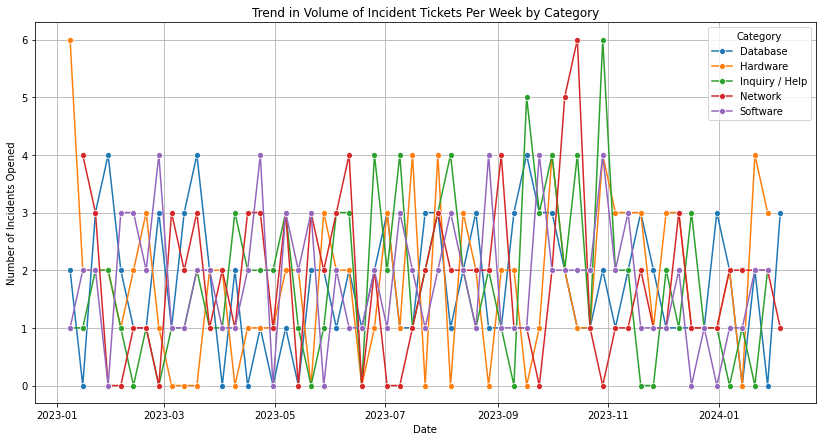

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'opened_at' and 'category'

# Convert 'opened_at' to datetime if it's not already
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Extract date from 'opened_at'
df['date'] = df['opened_at'].dt.date

# Group by category and date, then count the number of incidents
category_daily = df.groupby(['category', 'date']).size().reset_index(name='counts')

# Convert 'date' back to datetime for resampling
category_daily['date'] = pd.to_datetime(category_daily['date'])

# Prepare an empty DataFrame to hold resampled data
category_weekly = pd.DataFrame()

# Loop through each category to resample separately
for category in category_daily['category'].unique():
    temp_df = category_daily[category_daily['category'] == category]
    resampled_df = temp_df.set_index('date').resample('W').sum().reset_index()
    resampled_df['category'] = category  # add category column back after resampling
    category_weekly = pd.concat([category_weekly, resampled_df], ignore_index=True)

# Plot the trend for each category
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='counts', hue='category', data=category_weekly, marker='o')
plt.title("Trend in Volume of Incident Tickets Per Week by Category")
plt.xlabel("Date")
plt.ylabel("Number of Incidents Opened")
plt.legend(title='Category')
plt.grid(True)
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
"data_type":"time_series",
"insight": "There is no clear trend in the volume of incidents across different categories over time.",
"plot": {
    "plot_type": "multiple_line",
    "title": "Trend of number of incidents opened Across Categories Over Time",
    "x_axis": {
        "name": "Opened At",
        "description": "This represents the date when the incident was opened."
    },
    "y_axis": {
        "name": "Average Volume (incident count)",
        "description": "This represents the average number of incidents opened on a particular date."
    },
    "description": "The multiple line plot displays the trend of volume of incidents across different categories over time. Each line represents a category and the points on the line represent the average TTR for incidents of that category opened on a particular date. The trend is uniform across all categories, indicating that the increase in TTR is not specific to any particular category."
},
"question": "Is the increase in incidents uniform across all categories of incidents or is it more pronounced in a specific category?",
"actionable_insight": "There is no clear trend in the volume of incidents across different categories over time. This indicates that the increase in TTR is not specific to any particular category. To improve incident resolution efficiency, it is important to focus on optimizing the resolution process as a whole, rather than targeting specific categories. This approach can help in addressing common bottlenecks and improving overall incident resolution times."
}

{'data_type': 'time_series',
 'insight': 'There is no clear trend in the volume of incidents across different categories over time.',
 'plot': {'plot_type': 'multiple_line',
  'title': 'Trend of number of incidents opened Across Categories Over Time',
  'x_axis': {'name': 'Opened At',
   'description': 'This represents the date when the incident was opened.'},
  'y_axis': {'name': 'Average Volume (incident count)',
   'description': 'This represents the average number of incidents opened on a particular date.'},
  'description': 'The multiple line plot displays the trend of volume of incidents across different categories over time. Each line represents a category and the points on the line represent the average TTR for incidents of that category opened on a particular date. The trend is uniform across all categories, indicating that the increase in TTR is not specific to any particular category.'},
 'question': 'Is the increase in incidents uniform across all categories of incidents or

### **Question 4**: Are there any trends in the productivity of the human agents over time?

#### Plot number of incidents resolved per agent

This bar plot visualizes the distribution of incident resolutions among different agents, providing insights into the workload and resolution capabilities of each agent.

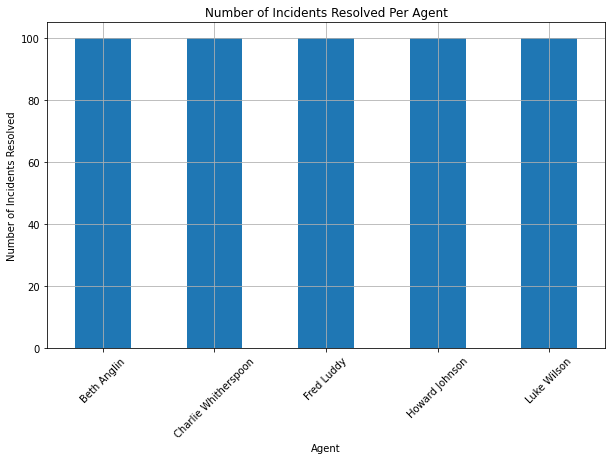

In [9]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
agent_incident_count.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents Resolved Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Resolved')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
"data_type":"descriptive",
"insight": "The productivity is similar for all agents, and all of them manage to resolve incidents even though the volume increases over time",
"plot": {
    "plot_type": "bar",
    "title": "Number of Incidents Resolved Per Agent",
    "x_axis": {
        "name": "Agent",
        "description": "This represents each agent assigned to resolve incidents."
    },
    "y_axis": {
        "name": "Number of Incidents Resolved",
        "description": "This represents the number of incidents resolved by an agent."
    },
    "description": "The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced."
},
"question": "Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent over time?",
"actionable_insight": "The uniform productivity across all agents suggests that the workload is evenly distributed and all agents are equally productive. This is a positive indicator of good workload management. However, it would still be beneficial to continually monitor agent productivity and workload to ensure this balance is maintained."
}

{'data_type': 'descriptive',
 'insight': 'The productivity is similar for all agents, and all of them manage to resolve incidents even though the volume increases over time',
 'plot': {'plot_type': 'bar',
  'title': 'Number of Incidents Resolved Per Agent',
  'x_axis': {'name': 'Agent',
   'description': 'This represents each agent assigned to resolve incidents.'},
  'y_axis': {'name': 'Number of Incidents Resolved',
   'description': 'This represents the number of incidents resolved by an agent.'},
  'description': 'The bar chart displays the number of incidents resolved per agent. Each bar represents an agent and the height of the bar represents the number of incidents resolved by that agent. The number of incidents resolved is more or less uniform across all agents, indicating that productivity is fairly balanced.'},
 'question': 'Are there any trends in the productivity of the human agents over time? For instance, is there a decrease in the number of incidents resolved per agent ov

### Summary of Findings (Flag 60)
1. **Uniform Time to Resolution**: The time to resolution (TTR) has remained relatively stable over time, indicating that the incident management process is consistent and efficient.
3. **Agent Productivity and Burnout**: While agents remain productive, there is a risk of burnout due to the increasing volume of incidents. It is essential to monitor agent workload and well-being to maintain operational efficiency.